### Classification Error Metric Challenges

**Settings:  Where applicable, use test_size=0.30, random_state=4444.  This will permit comparison of results across users.

*These reference the Classification Challenges.*

In [3]:
import pandas as pd
import numpy as np



#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).




In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [10]:
df.iloc[:,1:] = df.iloc[:,1:].applymap(lambda x: 1 if x == 'y' else (0 if x == 'n' else '?') )

In [11]:
def get_mean_of_column(series):
    return pd.to_numeric(series, errors="coerce").mean()

for i in range(1,17):
    df[i] = df[i].map(lambda x: get_mean_of_column(df[i]) if x == '?' else x)

In [44]:
y = df[0]
X = df.drop(0, axis=1)

In [45]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [47]:
nc = KNeighborsClassifier(n_neighbors=6)
nc.fit(X_train, y_train)
y_pred = nc.predict(X_test)

In [48]:
from sklearn import metrics

In [49]:
from sklearn.linear_model import LogisticRegression

In [105]:
logm = LogisticRegression()
logm.fit(X_train, y_train)
y_log_pred = logm.predict(X_test)

In [92]:
# print(metrics.confusion_matrix(y_test, y_log_pred))
# Retrieve precision
print("Scores for Logistic Regression Model")
p = metrics.precision_score(y_test, y_log_pred, pos_label="democrat")
# Retrieve Recall
r = metrics.recall_score(y_test, y_log_pred, pos_label="democrat")
# Print precision and recall
print ('Precision: ' + str(p))
print ('Recall: ' + str(r))
# # Retrieve F1 from sklearn and print
print ('F1: ' + str(metrics.f1_score(y_test, y_log_pred, pos_label="democrat")))

Scores for Logistic Regression Model
Precision: 0.925925925926
Recall: 0.974025974026
F1: 0.949367088608


In [66]:
# Retrieve precision
print("Scores for K Neighbors Model")
p = metrics.precision_score(y_test, y_pred, pos_label="democrat")
# Retrieve Recall
r = metrics.recall_score(y_test, y_pred, pos_label="democrat")
# Print precision and recall
print ('Precision: ' + str(p))
print ('Recall: ' + str(r))
# Retrieve F1 from sklearn and print
print ('F1: ' + str(metrics.f1_score(y_test, y_pred, pos_label="democrat")))

Scores for K Neighbors Model
Precision: 0.925
Recall: 0.961038961039
F1: 0.942675159236


#### Challenge 2

For each, draw the ROC curve and calculate the AUC.


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

In [133]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, logm.predict_proba(X_test)[:, 0], pos_label="democrat")

AUC of Logistic Regression 0.987734487734


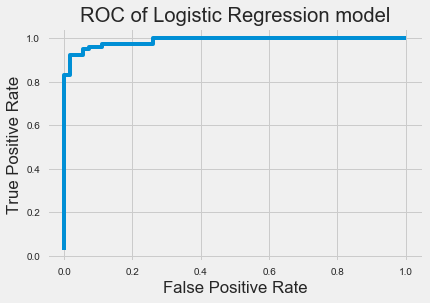

In [134]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Logistic Regression model');
print('AUC of Logistic Regression', metrics.auc(fpr, tpr))

In [130]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, nc.predict_proba(X_test)[:, 0], pos_label="democrat")

AUC of KNeighbors 0.948412698413


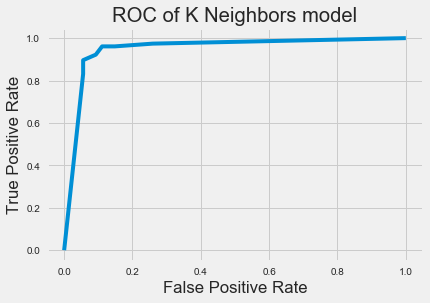

In [132]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of K Neighbors model');
print('AUC of KNeighbors', metrics.auc(fpr, tpr))



#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9).



In [140]:
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing

In [161]:
lb = preprocessing.LabelBinarizer()
y_binarized = lb.fit_transform(y)[:,-1]

In [164]:
recall_score = np.mean(cross_val_score(logm, X, y_binarized, scoring='recall'))
f1_score = np.mean(cross_val_score(logm, X, y_binarized, scoring='f1'))
precision_score = np.mean(cross_val_score(logm, X, y_binarized, scoring='precision'))
accuracy_score = np.mean(cross_val_score(logm, X, y_binarized, scoring='accuracy'))

In [165]:
print('recall score:', recall_score)
print('f1 score:', f1_score)
print('precision score:', precision_score)
print('accuracy score:', accuracy_score)

recall score: 0.952380952381
f1 score: 0.950059445472
precision score: 0.949398719643
accuracy score: 0.96091954023



#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.



In [172]:
df_2 = pd.read_csv('./amazon_data/2013_movies.csv')
df_2 = df_2.dropna()
df_2['MonthRelease'] = df_2['ReleaseDate'].map(lambda x: pd.to_datetime(x).month)

In [173]:
y_2 = df_2['Rating'].copy()
X_2 = df_2.drop(['Rating', 'Title', 'Director', 'ReleaseDate'], axis=1)

In [174]:
lr_model_1 = LogisticRegression()
lr_model_2 = KNeighborsClassifier()

In [195]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2,  test_size=.30, random_state=3333)

In [196]:
lr_model_1.fit(X_2_train, y_2_train)
lr_model_2.fit(X_2_train, y_2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [197]:
y_logm_pred = lr_model_1.predict(X_2_test)
y_kn_pred = lr_model_2.predict(X_2_test)

array(['PG', 'PG-13', 'R'], dtype=object)

In [203]:
print('Precision:', list(zip(lr_model_1.classes_, metrics.precision_score(y_2_test, y_logm_pred, average=None))))
print('Recall:', list(zip(lr_model_1.classes_, metrics.recall_score(y_2_test, y_logm_pred, average=None))))

Precision: [('PG', 0.0), ('PG-13', 0.66666666666666663), ('R', 0.44444444444444442)]
Recall: [('PG', 0.0), ('PG-13', 0.75), ('R', 0.5)]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [204]:
print('Precision:', list(zip(lr_model_1.classes_, metrics.precision_score(y_2_test, y_kn_pred, average=None))))
print('Recall:', list(zip(lr_model_1.classes_, metrics.recall_score(y_2_test, y_kn_pred, average=None))))

Precision: [('PG', 0.0), ('PG-13', 0.6428571428571429), ('R', 0.5)]
Recall: [('PG', 0.0), ('PG-13', 0.5625), ('R', 0.75)]



#### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.


In [205]:
df_hab = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=['age', 'operation_year', 'nodes', 'survival'])

In [214]:
df_hab['survival'] = df_hab['survival'].map( lambda x: 0 if x == 2 else x)
X = df_hab.drop(['survival'], axis=1).copy()
y = df_hab['survival']

In [215]:
lr_model = LogisticRegression()
X_train, X_te, y_train, y_te = train_test_split(X, y, test_size = 0.3, random_state = 44)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_te)

In [216]:
fpr, tpr, thresholds = metrics.roc_curve(y_te, lr_model.predict_proba(X_te)[:, 1])

AUC of Logistic Regression 0.664918414918


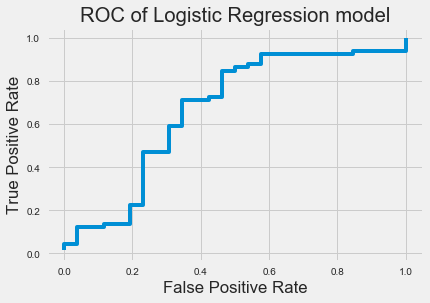

In [218]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Logistic Regression model');
print('AUC of Logistic Regression', metrics.auc(fpr, tpr))